In [7]:
%load_ext autoreload
%autoreload 2

from IPython.display import Image
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import json
import numpy as np
import jax
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from timecast.learners import AR
from timecast.learners._ar import _ar_predict, _ar_batch_window
from timecast.utils.numpy import ecdf
from timecast.utils.losses import MeanSquareError
import torch
import matplotlib

plt.rcParams['figure.figsize'] = [20, 10]

import tqdm.notebook as tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
batch_size_results = {}
for i in tqdm.tqdm([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]):
    with open("../tmp/batch_{}.pkl".format(i), "rb") as f:
        batch_size_results[i] = pickle.load(f)

In [3]:
def rolling_mean(x, n):
    return pd.Series(x).rolling(window=n, min_periods=1).mean()

In [4]:
rolling_means = {}
for i, batch_size_result in batch_size_results.items():
    rolling_means[i] = rolling_mean([result["mse"].item() for result in batch_size_result.values()], 531)

In [5]:
rolling_means = pd.DataFrame.from_dict(rolling_means)

Text(0.5, 0, 'Basin id')

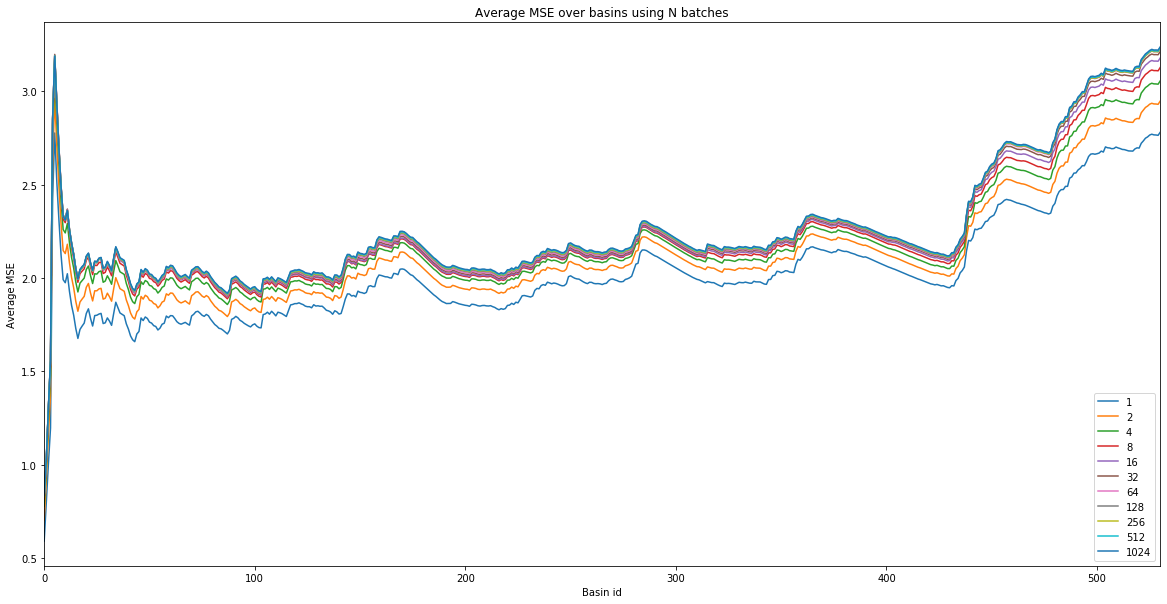

In [8]:
rolling_means.plot()
plt.title("Average MSE over basins using N batches")
plt.ylabel("Average MSE")
plt.xlabel("Basin id")

In [10]:
alex_results = pickle.load(open("../tmp/losses.pkl", "rb"))
rolling_means["alex"] = rolling_mean(alex_results["mses"], 531)

Text(0.5, 0, 'Basin id')

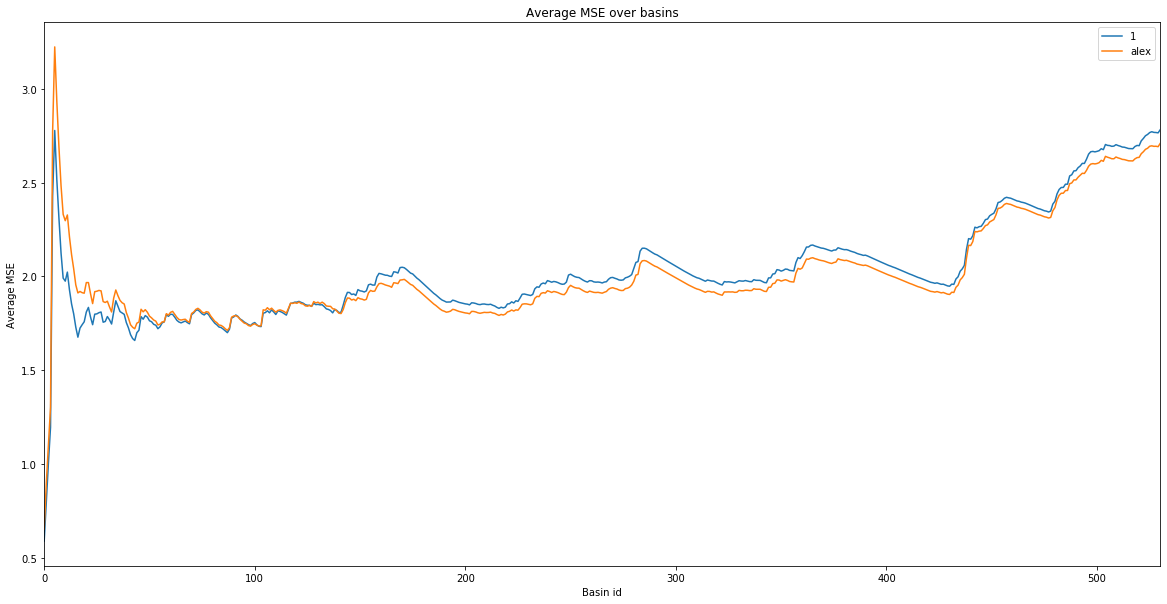

In [11]:
rolling_means[[1, "alex"]].plot()
plt.title("Average MSE over basins")
plt.ylabel("Average MSE")
plt.xlabel("Basin id")

In [13]:
mses = pd.DataFrame(list(zip([result["mse"].item() for result in batch_size_results[1].values()], alex_results["mses"])), columns=["batch_1", "alex"]).astype(float)

Text(0.5, 0, 'Basin id')

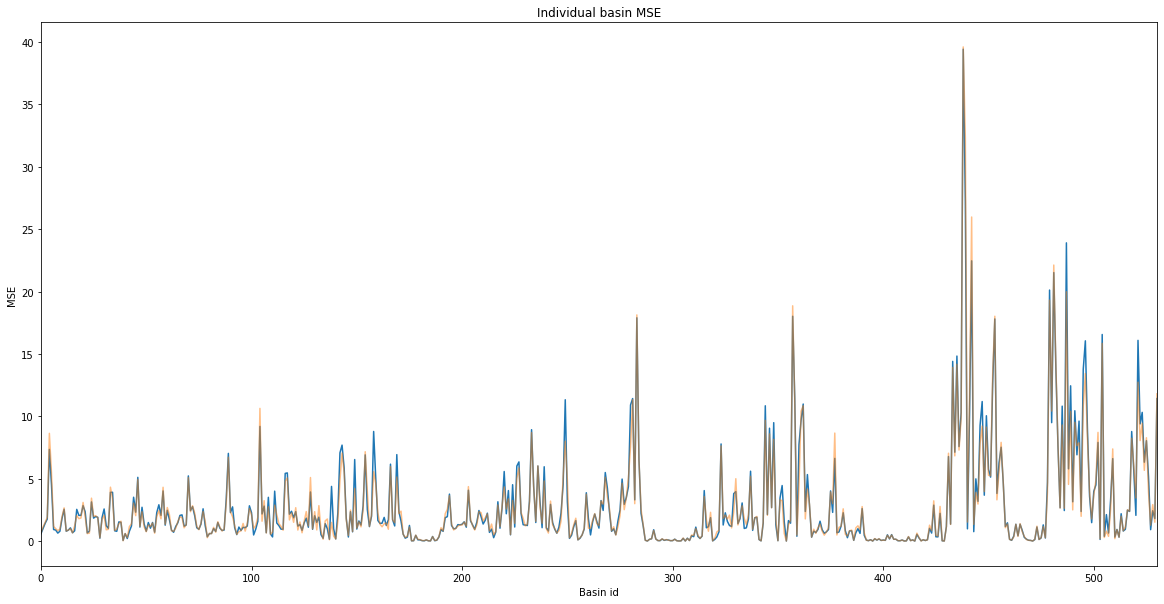

In [14]:
mses.batch_1.plot()
mses.alex.plot(alpha=0.5)
plt.title("Individual basin MSE")
plt.ylabel("MSE")
plt.xlabel("Basin id")

In [15]:
rolling_means

,1,2,4,8,16,32,64,128,256,512,1024,alex
0,0.590741,0.703835,0.776963,0.817762,0.832947,0.832625,0.830338,0.830193,0.833066,0.834066,0.833628,0.655101
1,0.796755,0.913065,0.979374,1.013434,1.022601,1.023027,1.021798,1.021444,1.024845,1.027551,1.029536,0.899891
2,1.006138,1.156442,1.243721,1.291457,1.305623,1.305873,1.303739,1.303611,1.305370,1.307211,1.309112,1.099509
3,1.196514,1.371272,1.478833,1.534969,1.555568,1.559194,1.554332,1.556116,1.557882,1.558396,1.559702,1.303137
4,2.427174,2.612000,2.749470,2.818390,2.842673,2.855193,2.852231,2.855409,2.852685,2.851491,2.851618,2.770393
5,2.777004,2.962747,3.101949,3.167858,3.188658,3.197906,3.191711,3.193422,3.190108,3.188922,3.189063,3.221977
6,2.513104,2.703297,2.845214,2.913549,2.935913,2.940696,2.933987,2.933514,2.929845,2.928794,2.928860,2.930255
7,2.309642,2.485429,2.614767,2.676873,2.697706,2.701983,2.695829,2.695257,2.691838,2.690823,2.690967,2.688549
8,2.124423,2.291517,2.413421,2.472114,2.492422,2.497153,2.491835,2.491640,2.488694,2.487788,2.488115,2.482639
9,1.991153,2.147255,2.259873,2.314818,2.334089,2.338364,2.333675,2.333377,2.330648,2.329833,2.330056,2.330688
